## 卷积神经网络
```
卷积神经网络：
卷积层 -> 池化层 -> 全连接层 -> 输出层

卷积层：通过指定的全局共享的卷积核对整体图像镜像卷积操作，提取特征。因为卷积核全局共享，因此提取的特征图包含整个图像的语义特征，但是主要还是突出局部特征。

池化层：为了防止过拟合，而将网络隐层产生的特征图进行赤化操作，即下采样。

全连接层：将所有特征图连接在一起，用户得分值计算

输出层：根据得分值进行回归或者分类的计算
```

<img src="./img/6.png">

<img src="./img/9.png" alt="FAO" width="490">

<img src="./img/8.png" alt="FAO" width="490">

## 01.Tensorflow-卷积神经网络
```
实现minist数据集中数字图片的识别
```

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
tf.reset_default_graph() 
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None, 28,28,1]) #shape in CNNs is always None x height x width x color channels
y_ = tf.placeholder("float", shape = [None, 10]) #shape is always None x number of classes

In [4]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))#shape is filter x filter x input channels x output channels  按照5 5的规格取特征 将1组特征数据转换为32个特征数据
b_conv1 = tf.Variable(tf.constant(.1, shape = [32])) #shape of the bias just has to match output channels of the filter

In [5]:
h_conv1 = tf.nn.conv2d(input=x, filter=W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1  #strides 学习步长 batchsize  h  w 通道数  padding自动补充
h_conv1 = tf.nn.relu(h_conv1) 
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  #ksize 将 2 2的窗口计算为统一个值

In [6]:
def conv2d(x, W):
    return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
#Second Conv and Pool Layers
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))    #将第一层网络生成的32个特征数据 转换为64个特征图
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#First Fully Connected Layer
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))  #28 通过两次poling操作 变成7 7，最终生成1024个结果
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])       #将数据拉成一列数据 
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1) #全连接成

#Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))   #将得到的1024个结果进行分类 分成10类
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

#Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))   #损失值
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)                                       #计算损失值得操作
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))                                        #运算结果
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))                                       #计算准确率

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
sess.run(tf.global_variables_initializer())

batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print ("step %d, training accuracy %g"%(i, trainAccuracy))
    trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

step 0, training accuracy 0.14
step 100, training accuracy 0.96
step 200, training accuracy 0.98
step 300, training accuracy 0.96
step 400, training accuracy 0.96
step 500, training accuracy 1
step 600, training accuracy 0.96
step 700, training accuracy 0.96
step 800, training accuracy 0.92
step 900, training accuracy 1


## 02.Tensorflow卷积神经网络猫狗识别

In [1]:
import pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [2]:
import numpy as np

def clean(data):
    imgs = data.reshape(data.shape[0], 3, 32, 32)
    grayscale_imgs = imgs.mean(1)
    cropped_imgs = grayscale_imgs[:, 4:28, 4:28]
    img_data = cropped_imgs.reshape(data.shape[0], -1)
    img_size = np.shape(img_data)[1]
    means = np.mean(img_data, axis=1)
    meansT = means.reshape(len(means), 1)
    stds = np.std(img_data, axis=1)
    stdsT = stds.reshape(len(stds), 1)
    adj_stds = np.maximum(stdsT, 1.0 / np.sqrt(img_size))
    normalized = (img_data - meansT) / adj_stds
    return normalized

In [3]:
def read_data(directory):
    names = unpickle('{}/batches.meta'.format(directory))['label_names']
    print('names', names)

    data, labels = [], []
    for i in range(1, 6):
        filename = '{}/data_batch_{}'.format(directory, i)
        batch_data = unpickle(filename)
        if len(data) > 0:
            data = np.vstack((data, batch_data['data']))
            labels = np.hstack((labels, batch_data['labels']))
        else:
            data = batch_data['data']
            labels = batch_data['labels']

    print(np.shape(data), np.shape(labels))

    data = clean(data)
    data = data.astype(np.float32)
    return names, data, labels

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


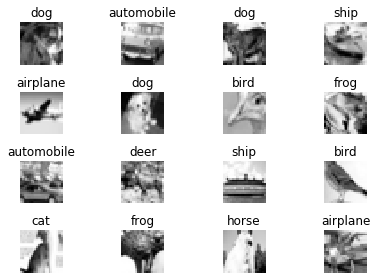

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
random.seed(1)

names, data, labels = read_data('./cifar-10-batches-py')

def show_some_examples(names, data, labels):
    plt.figure()
    rows, cols = 4, 4
    random_idxs = random.sample(range(len(data)), rows * cols)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        j = random_idxs[i]
        plt.title(names[labels[j]])
        img = np.reshape(data[j, :], (24, 24))
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('cifar_examples.png')

show_some_examples(names, data, labels)

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

names, data, labels = read_data('./cifar-10-batches-py')


def show_conv_results(data, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0, :, :, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()


def show_weights(W, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


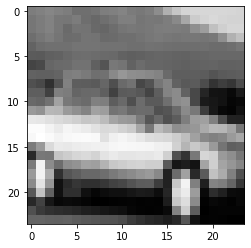

In [8]:
raw_data = data[4, :]
raw_img = np.reshape(raw_data, (24, 24))
plt.figure()
plt.imshow(raw_img, cmap='Greys_r')
plt.show()

In [9]:
x = tf.reshape(raw_data, shape=[-1, 24, 24, 1])
W = tf.Variable(tf.random_normal([5, 5, 1, 32]))
b = tf.Variable(tf.random_normal([32]))

conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
conv_with_b = tf.nn.bias_add(conv, b)
conv_out = tf.nn.relu(conv_with_b)

k = 2
maxpool = tf.nn.max_pool(conv_out, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

weights:


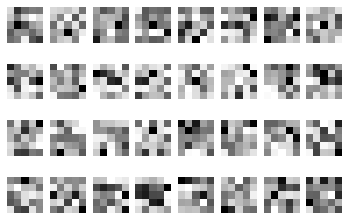

convolution results:
(1, 24, 24, 32)


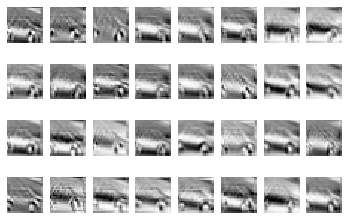

convolution with bias and relu:
(1, 24, 24, 32)


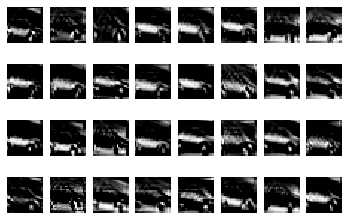

maxpool after all the convolutions:
(1, 12, 12, 32)


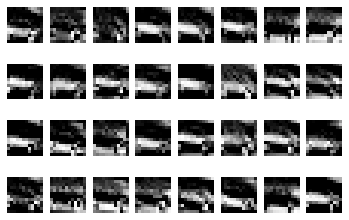

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    W_val = sess.run(W)
    print('weights:')
    show_weights(W_val)

    conv_val = sess.run(conv)
    print('convolution results:')
    print(np.shape(conv_val))
    show_conv_results(conv_val)
    

    conv_out_val = sess.run(conv_out)
    print('convolution with bias and relu:')
    print(np.shape(conv_out_val))
    show_conv_results(conv_out_val)


    maxpool_val = sess.run(maxpool)
    print('maxpool after all the convolutions:')
    print(np.shape(maxpool_val))
    show_conv_results(maxpool_val)

In [11]:
x = tf.placeholder(tf.float32, [None, 24 * 24])
y = tf.placeholder(tf.float32, [None, len(names)])
W1 = tf.Variable(tf.random_normal([5, 5, 1, 64]))
b1 = tf.Variable(tf.random_normal([64]))
W2 = tf.Variable(tf.random_normal([5, 5, 64, 64]))
b2 = tf.Variable(tf.random_normal([64]))
W3 = tf.Variable(tf.random_normal([6*6*64, 1024]))
b3 = tf.Variable(tf.random_normal([1024]))
W_out = tf.Variable(tf.random_normal([1024, len(names)]))
b_out = tf.Variable(tf.random_normal([len(names)]))

In [12]:
def conv_layer(x, W, b):
    conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
    conv_with_b = tf.nn.bias_add(conv, b)
    conv_out = tf.nn.relu(conv_with_b)
    return conv_out


def maxpool_layer(conv, k=2):
    return tf.nn.max_pool(conv, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [13]:
def model():
    x_reshaped = tf.reshape(x, shape=[-1, 24, 24, 1])

    conv_out1 = conv_layer(x_reshaped, W1, b1)
    maxpool_out1 = maxpool_layer(conv_out1)
    #提出了LRN层，对局部神经元的活动创建竞争机制，使得其中响应比较大的值变得相对更大，并抑制其他反馈较小的神经元，增强了模型的泛化能力。
    #推荐阅读http://blog.csdn.net/banana1006034246/article/details/75204013
    norm1 = tf.nn.lrn(maxpool_out1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75)
    conv_out2 = conv_layer(norm1, W2, b2)
    norm2 = tf.nn.lrn(conv_out2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75)
    maxpool_out2 = maxpool_layer(norm2)

    maxpool_reshaped = tf.reshape(maxpool_out2, [-1, W3.get_shape().as_list()[0]])
    local = tf.add(tf.matmul(maxpool_reshaped, W3), b3)
    local_out = tf.nn.relu(local)

    out = tf.add(tf.matmul(local_out, W_out), b_out)
    return out

In [14]:
learning_rate = 0.001
model_op = model()

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=model_op, labels=y)
)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(model_op, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    onehot_labels = tf.one_hot(labels, len(names), axis=-1)
    onehot_vals = sess.run(onehot_labels)
    batch_size = 64
    print('batch size', batch_size)
    for j in range(0, 1000):
        avg_accuracy_val = 0.
        batch_count = 0.
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size, :]
            batch_onehot_vals = onehot_vals[i:i+batch_size, :]
            _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: batch_data, y: batch_onehot_vals})
            avg_accuracy_val += accuracy_val
            batch_count += 1.
        avg_accuracy_val /= batch_count
        print('Epoch {}. Avg accuracy {}'.format(j, avg_accuracy_val))

## 03.Tensorflow猫狗识别模型保存&&load

In [1]:
import tensorflow as tf
import time
from datetime import timedelta
import math
import random
import numpy as np
import cv2
import os
import glob
from sklearn.utils import shuffle
import numpy as np
# conda install --channel https://conda.anaconda.org/menpo opencv3
#Adding Seed so that random initialization is consistent
from numpy.random import seed
seed(10)
from tensorflow import set_random_seed
set_random_seed(20)

C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

数据读取&&保存

In [2]:
# 定义图像数据读取 预处理函数
def load_train(train_path, image_size, classes):
    images = []
    labels = []
    img_names = []
    cls = []

    print('Going to read training images')
    for fields in classes:                                                     #从猫和狗的类别中读取数据
        index = classes.index(fields)                                          #获取类别的索引 以此判断是猫或者是狗
        print('Now going to read {} files (Index: {})'.format(fields, index))
        path = os.path.join(train_path, fields, '*g')                          #组装模糊查找文件路径
        files = glob.glob(path)                                                #模糊查找函数类似于sh脚本的find命令 返回所有文件列表
        for fl in files:                                                       #从文件列表中读取数据
            image = cv2.imread(fl)                                             #读取图片 将图片转换为矩阵
            image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR) #将双线性差值法将图片矩阵转换为指定大小
            image = image.astype(np.float32)                                   #将图像数据转换为float数据类型
            image = np.multiply(image, 1.0 / 255.0)                            #图像数据归一化操作
            images.append(image)                                               #数据保存
            label = np.zeros(len(classes))                                     #初始化一个二分类的标签数组 类似于one-hot-encoding                                 
            label[index] = 1.0                                                 #将相应类型的数据打上是的标签
            labels.append(label)                                               #将标签列表保存
            flbase = os.path.basename(fl)                                      #保存文件路径
            img_names.append(flbase)
            cls.append(fields)
    images = np.array(images)
    labels = np.array(labels)
    img_names = np.array(img_names)
    cls = np.array(cls)

    return images, labels, img_names, cls                                       #返回图像数据 标签 图像名 文件路径

数据预处理

In [17]:

class DataSet(object):

  def __init__(self, images, labels, img_names, cls):
    self._num_examples = images.shape[0]

    self._images = images       #保存图像数据
    self._labels = labels       #保存数据标签
    self._img_names = img_names #保存数据名字
    self._cls = cls             #保存数据路径
    self._epochs_done = 0       #数据管理模块 porch计数
    self._index_in_epoch = 0    #数据管理模块 
    

  def images(self):
    return self._images
  @property
  def labels(self):
    return self._labels
  @property
  def img_names(self):
    return self._img_names
  @property
  def cls(self):
    return self._cls
  @property
  def num_examples(self):
    return self._num_examples
  @property
  def epochs_done(self):
    return self._epochs_done
  # 定义数据类data中定义数据按照batch
  def next_batch(self, batch_size):
    """Return the next `batch_size` examples from this data set."""
    start = self._index_in_epoch                                  #记录当前已经学习的数据index
    self._index_in_epoch += batch_size                            #训练数据的长度

    if self._index_in_epoch > self._num_examples:                 #如果训练数据最后不足一个batch则从头开始取训练数据
      # After each epoch we update this
      self._epochs_done += 1                                      #并标记训练一个epoch的训练数据
      start = 0                                                    
      self._index_in_epoch = batch_size                            
      assert batch_size <= self._num_examples                     #断言训练的batch比训练数据小 否则为不合理训练训练
    end = self._index_in_epoch

    #将一个batch的训练数据返回
    return self._images[start:end], self._labels[start:end], self._img_names[start:end], self._cls[start:end]



def read_train_sets(train_path, image_size, classes, validation_size):
    class DataSets(object):
        pass  
    data_sets = DataSets()
    images, labels, img_names, cls = load_train(train_path, image_size, classes)  #读取数据 将图像数据信息 数据标签 图片名字 文件路径返回
    images, labels, img_names, cls = shuffle(images, labels, img_names, cls)      #进行数据洗牌操作
    
    if isinstance(validation_size, float):
        validation_size = int(validation_size * images.shape[0])                    #按照比例取数据

    validation_images = images[:validation_size]                                  #验证数据集
    validation_labels = labels[:validation_size]
    validation_img_names = img_names[:validation_size]
    validation_cls = cls[:validation_size]

    train_images = images[validation_size:]                                       #训练数据集
    train_labels = labels[validation_size:]
    train_img_names = img_names[validation_size:]
    train_cls = cls[validation_size:]

    data_sets.train = DataSet(train_images, train_labels, train_img_names, train_cls)   #保存训练数据的数据和标签
    data_sets.valid = DataSet(validation_images, validation_labels, validation_img_names, validation_cls) #保存验证数据的数据和标签

    return data_sets

In [18]:
# 数据读取
batch_size = 32

#Prepare input data
classes = ['dogs','cats']
num_classes = len(classes)

# 20% of the data will automatically be used for validation
validation_size = 0.2    #选择数据训练数据个测试数据为4:1
img_size = 64            #将图片转换为64*64的图片
num_channels = 3         
train_path='training_data'

# We shall load all the training and validation images and labels into memory using openCV and use that during training
data = read_train_sets(train_path, img_size, classes, validation_size=validation_size)


print("Complete reading input data. Will Now print a snippet of it")
print("Number of files in Training-set:\t\t{}".format(len(data.train.labels)))
print("Number of files in Validation-set:\t{}".format(len(data.valid.labels)))

Going to read training images
Now going to read dogs files (Index: 0)
Now going to read cats files (Index: 1)
Complete reading input data. Will Now print a snippet of it
Number of files in Training-set:		0
Number of files in Validation-set:	0


模型搭建&&训练&&保存

In [ ]:
session = tf.Session()
x = tf.placeholder(tf.float32, shape=[None, img_size,img_size,num_channels], name='x')    #训练模型数据占位符 

## labels
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')             #标签
y_true_cls = tf.argmax(y_true, dimension=1)


filter_size_conv1 = 3           #定义隐层1的卷积核为3*3
num_filters_conv1 = 32          #定义隐层1生成的特征图个数为32

filter_size_conv2 = 3           #定义隐层2的卷积核为3*3
num_filters_conv2 = 32          #定义隐层2生成的特征图个数为32
 
filter_size_conv3 = 3           #定义隐层3的卷积核为3*3
num_filters_conv3 = 64          #定义隐层3生成的特征图个数为64
    
fc_layer_size = 1024            #定义全连接层将最终的64个特征数据连接成一个1维数据 并从一维数据中提取出1024个特征

#定义权重变量设置
def create_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
#定义偏移量
def create_biases(size):
    return tf.Variable(tf.constant(0.05, shape=[size]))

#定义卷积层
def create_convolutional_layer(input,
               num_input_channels, 
               conv_filter_size,        
               num_filters):  
    
    ## We shall define the weights that will be trained using create_weights function. 3 3 3 32
    weights = create_weights(shape=[conv_filter_size, conv_filter_size, num_input_channels, num_filters])
    ## We create biases using the create_biases function. These are also trained.
    biases = create_biases(num_filters)

    ## Creating the convolutional layer
    layer = tf.nn.conv2d(input=input,
                     filter=weights,
                     strides=[1, 1, 1, 1],
                     padding='SAME')

    layer += biases
    
    layer = tf.nn.relu(layer)
    
    ## We shall be using max-pooling.  
    layer = tf.nn.max_pool(value=layer,
                            ksize=[1, 2, 2, 1],
                            strides=[1, 2, 2, 1],
                            padding='SAME')
    ## Output of pooling is fed to Relu which is the activation function for us.
    #layer = tf.nn.relu(layer)

    return layer

#定义全连接层的图像归一处理
def create_flatten_layer(layer):
    #We know that the shape of the layer will be [batch_size img_size img_size num_channels] 
    # But let's get it from the previous layer.
    layer_shape = layer.get_shape()

    ## Number of features will be img_height * img_width* num_channels. But we shall calculate it in place of hard-coding it.
    num_features = layer_shape[1:4].num_elements()

    ## Now, we Flatten the layer so we shall have to reshape to num_features
    layer = tf.reshape(layer, [-1, num_features])

    return layer

#定义全连接层
def create_fc_layer(input,          
             num_inputs,    
             num_outputs,
             use_relu=True):
    
    #Let's define trainable weights and biases.
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)

    # Fully connected layer takes input x and produces wx+b.Since, these are matrices, we use matmul function in Tensorflow
    layer = tf.matmul(input, weights) + biases
    
    layer=tf.nn.dropout(layer,keep_prob=0.7)
    
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

#网络结构定义
layer_conv1 = create_convolutional_layer(input=x,
               num_input_channels=num_channels,
               conv_filter_size=filter_size_conv1,
               num_filters=num_filters_conv1)
layer_conv2 = create_convolutional_layer(input=layer_conv1,
               num_input_channels=num_filters_conv1,
               conv_filter_size=filter_size_conv2,
               num_filters=num_filters_conv2)

layer_conv3= create_convolutional_layer(input=layer_conv2,
               num_input_channels=num_filters_conv2,
               conv_filter_size=filter_size_conv3,
               num_filters=num_filters_conv3)
          
layer_flat = create_flatten_layer(layer_conv3)

layer_fc1 = create_fc_layer(input=layer_flat,
                     num_inputs=layer_flat.get_shape()[1:4].num_elements(),
                     num_outputs=fc_layer_size,
                     use_relu=True)

layer_fc2 = create_fc_layer(input=layer_fc1,
                     num_inputs=fc_layer_size,
                     num_outputs=num_classes,
                     use_relu=False) 

#全连接层分类后的数据预测
y_pred = tf.nn.softmax(layer_fc2,name='y_pred')
y_pred_cls = tf.argmax(y_pred, dimension=1)

#定义目标函数 以及准确率
session.run(tf.global_variables_initializer())
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                    labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)    #自适应梯度下降
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


#定义显示函数
def show_progress(epoch, feed_dict_train, feed_dict_validate, val_loss,i):
    acc = session.run(accuracy, feed_dict=feed_dict_train)
    val_acc = session.run(accuracy, feed_dict=feed_dict_validate)
    msg = "Training Epoch {0}--- iterations: {1}--- Training Accuracy: {2:>6.1%}, Validation Accuracy: {3:>6.1%},  Validation Loss: {4:.3f}"
    print(msg.format(epoch + 1,i, acc, val_acc, val_loss))

total_iterations = 0        #训练数据计数
saver = tf.train.Saver()    #模型保存句柄

#定义训练模型
def train(num_iteration):
    global total_iterations
    
    for i in range(total_iterations,
                   total_iterations + num_iteration):

        x_batch, y_true_batch, _, cls_batch = data.train.next_batch(batch_size)
        x_valid_batch, y_valid_batch, _, valid_cls_batch = data.valid.next_batch(batch_size)

        
        feed_dict_tr = {x: x_batch,
                           y_true: y_true_batch}
        feed_dict_val = {x: x_valid_batch,
                              y_true: y_valid_batch}

        session.run(optimizer, feed_dict=feed_dict_tr)

        if i % int(data.train.num_examples/batch_size) == 0: 
            val_loss = session.run(cost, feed_dict=feed_dict_val)
            epoch = int(i / int(data.train.num_examples/batch_size))    
            
            show_progress(epoch, feed_dict_tr, feed_dict_val, val_loss,i)
            saver.save(session, './dogs-cats-model/dog-cat.ckpt',global_step=i)  #保存模型


    total_iterations += num_iteration

模型load&&测试

In [ ]:
import tensorflow as tf
import numpy as np
import os,glob,cv2
import sys,argparse


#和训练数据相同的预处理
image_size=64        
num_channels=3
images = []

path = 'cat.4.jpg'
image = cv2.imread(path)
# Resizing the image to our desired size and preprocessing will be done exactly as done during training
image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
images.append(image)
images = np.array(images, dtype=np.uint8)
images = images.astype('float32')
images = np.multiply(images, 1.0/255.0) 
#The input to the network is of shape [None image_size image_size num_channels]. Hence we reshape.
x_batch = images.reshape(1, image_size,image_size,num_channels)

## Let us restore the saved model 
sess = tf.Session()
# Step-1: Recreate the network graph. At this step only graph is created.
#导入保存的网络图创建学习网络
saver = tf.train.import_meta_graph('./dogs-cats-model/dog-cat.ckpt-7850.meta')
# Step-2: Now let's load the weights saved using the restore method.
#重新加载网络模型中模型权重值
saver.restore(sess, './dogs-cats-model/dog-cat.ckpt-7850')

# Accessing the default graph which we have restored
#访问重新加载的图形
graph = tf.get_default_graph()

# Now, let's get hold of the op that we can be processed to get the output.
# In the original network y_pred is the tensor that is the prediction of the network
y_pred = graph.get_tensor_by_name("y_pred:0")

## Let's feed the images to the input placeholders
x= graph.get_tensor_by_name("x:0") 
y_true = graph.get_tensor_by_name("y_true:0") 
y_test_images = np.zeros((1, 2)) 


### Creating the feed_dict that is required to be fed to calculate y_pred 
feed_dict_testing = {x: x_batch, y_true: y_test_images}
result=sess.run(y_pred, feed_dict=feed_dict_testing)
# result is of this format [probabiliy_of_rose probability_of_sunflower]
# dog [1 0]
res_label = ['dog','cat']
print(res_label[result.argmax()])

### Tensorflow提供了图形可视化


1. 可视化图形graph保存

```
代码：
sess.run(tf.global_variables_initializer())   #图形初始化
tenboard_dir = './tensorboard/test1/'       #图形保存地址

writer = tf.summary.FileWriter(tenboard_dir + hparam)   #指定地址 打开一个写文件的操作句柄 图形保存于 ./tensorboard/test1/目录下
writer.add_graph(sess.graph)                   #使用操作句柄将图形保存下来



for i in range(500):

    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1]})
```

2. 增加图形可视化选项

```
如果只执行第一步，则只会绘制graph图形，不能绘制loss等图形，如果想绘制损失值 正确率等图形，则需要使用以下代码

with tf.name_scope("loss"):
    xent = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=y), name="loss")
    tf.summary.scalar("loss", xent)

with tf.name_scope("train"):
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(xent)

with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy", accuracy)

以下是将所有图像集成到一起
summ = tf.summary.merge_all()
```

<img src="./img/tensorflow_graph.png" style='zoom:50%'>

3. 图形读取：

```
->在CMD命令行窗口首先进入到进入到/tensorboard/test1/

->执行tensorboard --logdir=./test1    （注意参数赋值是当前图形保存目录）

->打开浏览器： http://localhost:6006  （tensorflow默认浏览器 即 端口）
```


4. 使用numpy plot显示图形
```
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lns1 = ax1.plot(np.arange(1000), fig_loss, label="Loss")
```
按一定间隔显示实现方法
```
ax2.plot(200 * np.arange(len(fig_accuracy)), fig_accuracy, 'r')
lns2 = ax2.plot(np.arange(1000), fig_accuracy, 'r', label="Accuracy")
ax1.set_xlabel('iteration')
ax1.set_ylabel('training loss')
ax2.set_ylabel('training accuracy')
```
合并图例

```
lns = lns1 + lns2
labels = ["Loss", "Accuracy"]
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc=7)
```

## Pytorch-卷积神经网络

(50000, 784)


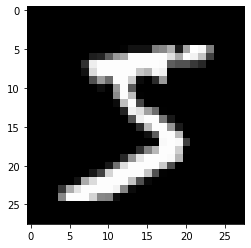

In [10]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
        
        
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)),cmap='gray')
print(x_train.shape)

import torch 
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def DataGet(x_train,y_train,x_valid,y_valid,batch):
    
    x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))
    train_dataset    = TensorDataset(x_train,y_train)
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    valid_dataset    = TensorDataset(x_valid,y_valid)
    valid_dataloader = DataLoader(dataset=valid_dataset,
                                  batch_size=batch,
                                  shuffle=True)
    
    return train_dataloader,valid_dataloader

In [18]:
from torchvision import datasets,transforms 

# 训练集
train_dataset = datasets.MNIST(root='./data',  
                            train=True,   
                            transform=transforms.ToTensor(),  
                            download=True) 

# 测试集
test_dataset = datasets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# 构建batch数据
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

9920512it [00:08, 1133735.67it/s]                                                                                      


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


32768it [00:00, 82581.78it/s]                                                                                          


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


1654784it [00:03, 436957.81it/s]                                                                                       


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


8192it [00:03, 4987.92it/s]                                                                                            


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


### pytorch神经网络定义

In [19]:
from torch  import nn
import torch.nn.functional as F

class Minist_NN(nn.Module):
    def __init__(self,in_channel,out_channel):
        super(Minist_NN,self).__init__()
        self.hiddenLine1 = nn.Linear(in_channel,128)
        self.hiddenLine2 = nn.Linear(128,256)
        self.out = nn.Linear(256,out_channel)
    
    def forward(self,x):
        x = F.relu(self.hiddenLine1(x))
        x = F.relu(self.hiddenLine2(x))
        x = self.out(x)
        return x

### pytorch卷积神经网络定义

In [20]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # 输入大小 (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # 灰度图
                out_channels=16,            # 要得到几多少个特征图
                kernel_size=5,              # 卷积核大小
                stride=1,                   # 步长
                padding=2,                  # 如果希望卷积后大小跟原来一样，需要设置padding=(kernel_size-1)/2 if stride=1
            ),                              # 输出的特征图为 (16, 28, 28)
            nn.ReLU(),                      # relu层
            nn.MaxPool2d(kernel_size=2),    # 进行池化操作（2x2 区域）, 输出结果为： (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # 下一个套餐的输入 (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # 输出 (32, 14, 14)
            nn.ReLU(),                      # relu层
            nn.MaxPool2d(2),                # 输出 (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # 全连接层得到的结果

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten操作，结果为：(batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output

### 准确率作为评估标准

In [21]:
def accuracy(predictions, labels):
    pred = torch.max(predictions.data, 1)[1] 
    rights = pred.eq(labels.data.view_as(pred)).sum() 
    return rights, len(labels) 

### 训练网络模型

In [22]:
import torch.optim as optim
# 定义超参数 
input_size = 28  #图像的总尺寸28*28
num_classes = 10  #标签的种类数
num_epochs = 3  #训练的总循环周期
batch_size = 64  #一个撮（批次）的大小，64张图片

# 实例化
net = CNN() 
#损失函数
criterion = nn.CrossEntropyLoss() 
#优化器
optimizer = optim.Adam(net.parameters(), lr=0.001) #定义优化器，普通的随机梯度下降算法

#开始训练循环
for epoch in range(num_epochs):
    #当前epoch的结果保存下来
    train_rights = [] 
    
    for batch_idx, (data, target) in enumerate(train_loader):  #针对容器中的每一个批进行循环
        net.train()                             
        output = net(data) 
        loss = criterion(output, target) 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        right = accuracy(output, target) 
        train_rights.append(right) 

    
        if batch_idx % 100 == 0: 
            
            net.eval() 
            val_rights = [] 
            
            for (data, target) in test_loader:
                output = net(data) 
                right = accuracy(output, target) 
                val_rights.append(right)
                
            #准确率计算
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))

            print('当前epoch: {} [{}/{} ({:.0f}%)]\t损失: {:.6f}\t训练集准确率: {:.2f}%\t测试集正确率: {:.2f}%'.format(
                epoch, batch_idx * batch_size, len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.data, 
                100. * train_r[0].numpy() / train_r[1], 
                100. * val_r[0].numpy() / val_r[1]))

当前epoch: 0 [0/60000 (0%)]	损失: 2.310008	训练集准确率: 10.94%	测试集正确率: 18.01%
当前epoch: 0 [6400/60000 (11%)]	损失: 0.299901	训练集准确率: 77.03%	测试集正确率: 92.62%
当前epoch: 0 [12800/60000 (21%)]	损失: 0.089690	训练集准确率: 85.47%	测试集正确率: 95.17%
当前epoch: 0 [19200/60000 (32%)]	损失: 0.097961	训练集准确率: 88.84%	测试集正确率: 96.72%
当前epoch: 0 [25600/60000 (43%)]	损失: 0.051377	训练集准确率: 90.71%	测试集正确率: 97.29%
当前epoch: 0 [32000/60000 (53%)]	损失: 0.063180	训练集准确率: 91.93%	测试集正确率: 97.53%
当前epoch: 0 [38400/60000 (64%)]	损失: 0.088459	训练集准确率: 92.84%	测试集正确率: 97.78%
当前epoch: 0 [44800/60000 (75%)]	损失: 0.135939	训练集准确率: 93.53%	测试集正确率: 97.42%
当前epoch: 0 [51200/60000 (85%)]	损失: 0.067996	训练集准确率: 94.04%	测试集正确率: 98.20%
当前epoch: 0 [57600/60000 (96%)]	损失: 0.035898	训练集准确率: 94.41%	测试集正确率: 98.26%
当前epoch: 1 [0/60000 (0%)]	损失: 0.028873	训练集准确率: 100.00%	测试集正确率: 98.02%
当前epoch: 1 [6400/60000 (11%)]	损失: 0.038822	训练集准确率: 98.00%	测试集正确率: 98.48%
当前epoch: 1 [12800/60000 (21%)]	损失: 0.165712	训练集准确率: 98.15%	测试集正确率: 98.30%
当前epoch: 1 [19200/60000 (32%)]	损失: 0.021130	训练集准确